# Predict assessed property value for the purpose of property tax assessment


In [1]:
import numpy as np # numpy used for mathematical operation on array
import pandas as pd  # pandas used for data manipulation on dataframe
import seaborn as sns # seaborn used for data visualization
import matplotlib.pyplot as plt # matplotlib used for data visualization

In [2]:
df = pd.read_csv('/content/Train.csv')

In [3]:
df.head()

,PropertyID,Borough,State,Surroundings,Address,ZipCode,Block,Lot,BldgClassCategory,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,DateOfEvaluation,PropertyEvaluationvalue
0,PR11101,1,NY,BATHGATE,1473 CROTONA PLACE,10456,2927,127,02 TWO FAMILY DWELLINGS,2,0,2,1900,2394,1990,1,B1,30-05-2014,540000
1,PR11102,1,NY,BATHGATE,453 EAST 181,10457,3037,110,03 THREE FAMILY DWELLINGS,3,0,3,1687,3037,2002,1,C0,13-09-2014,750000
2,PR11103,1,NY,BATHGATE,511 EAST 171 STREET,10457,2912,155,02 TWO FAMILY DWELLINGS,2,0,2,2000,2400,1989,1,B1,28-09-2014,470000
3,PR11104,1,NY,BATHGATE,547 CLAREMONT PARKWAY,10457,2929,134,02 TWO FAMILY DWELLINGS,2,0,2,2356,2394,1991,1,B1,05-06-2014,570000
4,PR11105,1,NY,BATHGATE,2063 WASHINGTON AVENUE,10457,3036,140,02 TWO FAMILY DWELLINGS,2,0,2,3346,2308,1993,1,B1,07-02-2015,640000


In [4]:
df.tail()

,PropertyID,Borough,State,Surroundings,Address,ZipCode,Block,Lot,BldgClassCategory,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,DateOfEvaluation,PropertyEvaluationvalue
16805,PR27906,4,NY,CIVIC CENTER,30 PARK PLACE,10007,123,1213,13 CONDOS - ELEVATOR APARTMENTS,1,0,1,29715,2803,2004,2,R4,30-11-2014,8454562
16806,PR27907,4,NY,CIVIC CENTER,56 LEONARD STREET,10013,176,1054,13 CONDOS - ELEVATOR APARTMENTS,1,0,1,12518,2252,2003,2,R4,19-12-2014,6250000
16807,PR27908,4,NY,CIVIC CENTER,56 LEONARD STREET,10013,176,1102,13 CONDOS - ELEVATOR APARTMENTS,1,0,1,12518,2177,2003,2,R4,16-11-2014,7150000
16808,PR27909,4,NY,TRIBECA,250 SOUTH END AVENUE,10280,16,2249,13 CONDOS - ELEVATOR APARTMENTS,1,0,1,12644,594,1981,2,R4,17-09-2014,550000
16809,PR27910,4,NY,HARLEM-UPPER,415 WEST 150 STREET,10031,2065,22,08 RENTALS - ELEVATOR APARTMENTS,16,1,17,4996,29529,2007,2,D7,22-03-2013,5000000


In [5]:
df.shape

(16810, 19)

In [6]:
df.columns

Index(['PropertyID', 'Borough', 'State', 'Surroundings', 'Address', 'ZipCode',
       'Block', 'Lot', 'BldgClassCategory', 'NoOfResidentialUnits',
       'NoOfCommercialUnits', 'TotalNoOfUnits', 'LandAreaInSqFt',
       'GrossAreaInSqFt', 'YearOfConstruction', 'TaxClass_AtEvaluationTime',
       'BldgClass_AtEvaluationTime', 'DateOfEvaluation',
       'PropertyEvaluationvalue'],
      dtype='object')

In [7]:
df.dtypes

PropertyID                    object
Borough                        int64
State                         object
Surroundings                  object
Address                       object
ZipCode                        int64
Block                          int64
Lot                            int64
BldgClassCategory             object
NoOfResidentialUnits           int64
NoOfCommercialUnits            int64
TotalNoOfUnits                 int64
LandAreaInSqFt                 int64
GrossAreaInSqFt                int64
YearOfConstruction             int64
TaxClass_AtEvaluationTime      int64
BldgClass_AtEvaluationTime    object
DateOfEvaluation              object
PropertyEvaluationvalue        int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16810 entries, 0 to 16809
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   PropertyID                  16810 non-null  object
 1   Borough                     16810 non-null  int64 
 2   State                       16810 non-null  object
 3   Surroundings                16810 non-null  object
 4   Address                     16810 non-null  object
 5   ZipCode                     16810 non-null  int64 
 6   Block                       16810 non-null  int64 
 7   Lot                         16810 non-null  int64 
 8   BldgClassCategory           16810 non-null  object
 9   NoOfResidentialUnits        16810 non-null  int64 
 10  NoOfCommercialUnits         16810 non-null  int64 
 11  TotalNoOfUnits              16810 non-null  int64 
 12  LandAreaInSqFt              16810 non-null  int64 
 13  GrossAreaInSqFt             16810 non-null  in

In [9]:
df.isnull().sum()

PropertyID                    0
Borough                       0
State                         0
Surroundings                  0
Address                       0
ZipCode                       0
Block                         0
Lot                           0
BldgClassCategory             0
NoOfResidentialUnits          0
NoOfCommercialUnits           0
TotalNoOfUnits                0
LandAreaInSqFt                0
GrossAreaInSqFt               0
YearOfConstruction            0
TaxClass_AtEvaluationTime     0
BldgClass_AtEvaluationTime    0
DateOfEvaluation              0
PropertyEvaluationvalue       0
dtype: int64

In [10]:
#remove duplicate value if any

df = df.drop_duplicates()

In [11]:
df.shape

(16810, 19)

In [12]:
# Creating the Data Dictionary with first column being datatype.

Data_dict = pd.DataFrame(df.dtypes)
Data_dict

,0
PropertyID,object
Borough,int64
State,object
Surroundings,object
Address,object
ZipCode,int64
Block,int64
Lot,int64
BldgClassCategory,object
NoOfResidentialUnits,int64


In [13]:
# Identifying unique values . For this we used nunique() which returns unique elements in the object.

Data_dict['UniqueVal'] = df.nunique()
Data_dict

,0,UniqueVal
PropertyID,object,16810
Borough,int64,5
State,object,1
Surroundings,object,243
Address,object,15219
ZipCode,int64,174
Block,int64,6405
Lot,int64,1299
BldgClassCategory,object,52
NoOfResidentialUnits,int64,70


In [14]:
corr = df.corr()
corr

,Borough,ZipCode,Block,Lot,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,PropertyEvaluationvalue
Borough,1.000000,0.488406,0.313951,0.005866,-0.005122,-0.006849,-0.006620,0.002994,0.005231,-0.168352,0.003318,0.049743
ZipCode,0.488406,1.000000,0.528438,-0.125573,0.014876,-0.002288,0.013504,-0.046456,-0.090817,-0.261036,-0.044437,-0.012603
Block,0.313951,0.528438,1.000000,-0.240481,-0.008005,-0.024037,-0.013785,-0.046750,-0.083749,-0.269244,-0.234643,-0.186906
Lot,0.005866,-0.125573,-0.240481,1.000000,-0.025278,-0.000308,-0.024030,0.234273,-0.050164,0.339635,0.280392,0.207938
NoOfResidentialUnits,-0.005122,0.014876,-0.008005,-0.025278,1.000000,0.073065,0.966332,0.049807,0.467357,0.005098,0.038005,0.098409
NoOfCommercialUnits,-0.006849,-0.002288,-0.024037,-0.000308,0.073065,1.000000,0.327214,0.660527,0.604961,0.020689,0.219687,0.068230
TotalNoOfUnits,-0.006620,0.013504,-0.013785,-0.024030,0.966332,0.327214,1.000000,0.217598,0.598885,0.010168,0.092686,0.110843
LandAreaInSqFt,0.002994,-0.046456,-0.046750,0.234273,0.049807,0.660527,0.217598,1.000000,0.465828,0.018417,0.090533,0.034867
GrossAreaInSqFt,0.005231,-0.090817,-0.083749,-0.050164,0.467357,0.604961,0.598885,0.465828,1.000000,0.085072,0.328519,0.068621
YearOfConstruction,-0.168352,-0.261036,-0.269244,0.339635,0.005098,0.020689,0.010168,0.018417,0.085072,1.000000,0.210623,0.113079


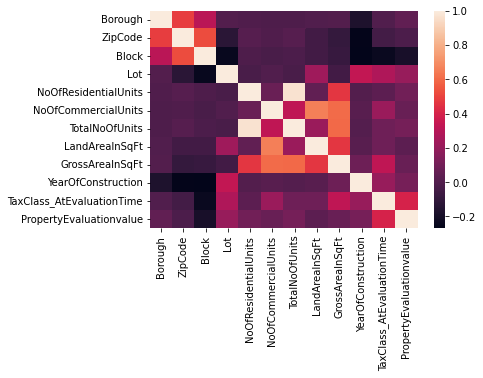

In [15]:
# Visulaizing the heatmap of complete dataset

sns.heatmap(corr)

In [16]:
#since TotalNoOfUnits and NoOfResidentialUnits have strong co relation drop one column

df = df.drop(['TotalNoOfUnits'],  axis=1)

In [17]:
df.columns

Index(['PropertyID', 'Borough', 'State', 'Surroundings', 'Address', 'ZipCode',
       'Block', 'Lot', 'BldgClassCategory', 'NoOfResidentialUnits',
       'NoOfCommercialUnits', 'LandAreaInSqFt', 'GrossAreaInSqFt',
       'YearOfConstruction', 'TaxClass_AtEvaluationTime',
       'BldgClass_AtEvaluationTime', 'DateOfEvaluation',
       'PropertyEvaluationvalue'],
      dtype='object')

In [18]:
df.describe()

,Borough,ZipCode,Block,Lot,NoOfResidentialUnits,NoOfCommercialUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,PropertyEvaluationvalue
count,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,1.681000e+04,1.681000e+04,16810.000000,16810.000000,1.681000e+04
mean,3.439143,10871.027543,5428.122308,266.327722,1.862225,0.137775,1.092492e+04,3.612157e+03,1973.982867,1.289530,8.084101e+05
std,1.398950,522.996869,3710.031921,542.420132,8.027805,2.185857,5.837620e+04,1.627378e+04,23.632595,0.713779,8.978317e+05
min,1.000000,10001.000000,6.000000,1.000000,0.000000,0.000000,1.000000e+00,1.000000e+00,1941.000000,1.000000,1.000440e+05
25%,2.000000,10312.000000,2401.250000,25.000000,1.000000,0.000000,2.100000e+03,1.224000e+03,1951.000000,1.000000,4.250000e+05
50%,3.000000,11207.000000,5050.000000,52.000000,1.000000,0.000000,3.200000e+03,1.750000e+03,1968.000000,1.000000,5.900000e+05
75%,5.000000,11364.000000,7376.750000,138.000000,2.000000,0.000000,5.000000e+03,2.449750e+03,1998.000000,1.000000,8.450000e+05
max,5.000000,11694.000000,16314.000000,5323.000000,437.000000,252.000000,5.612000e+06,1.172005e+06,2012.000000,4.000000,9.935000e+06


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


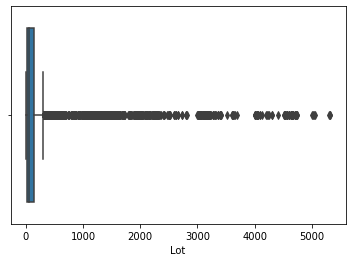

In [19]:
sns.boxplot(df['Lot'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f82facbe090>,
 'caps': [<matplotlib.lines.Line2D at 0x7f82facbebd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f82fad37b10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f82facc6650>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f82facc6b90>],
 'means': []}

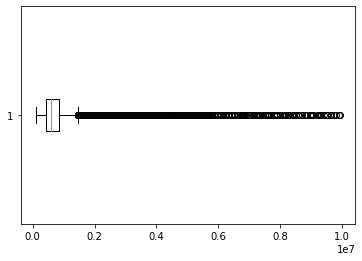

In [20]:
plt.boxplot(df['PropertyEvaluationvalue'], vert = False)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f82faca8a10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f82facad4d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f82faca8490>],
 'medians': [<matplotlib.lines.Line2D at 0x7f82facadf90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f82facb6510>],
 'means': []}

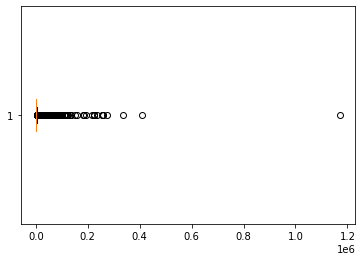

In [21]:
plt.boxplot(df['GrossAreaInSqFt'], vert = False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


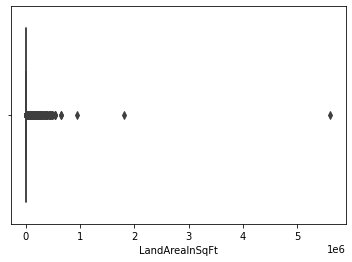

In [22]:
sns.boxplot(df['LandAreaInSqFt'])

In [23]:
#outlier treatment by upper bound and lower bound

per25 = df['Lot'].quantile(0.25)
per75 = df['Lot'].quantile(0.75)

In [24]:
per25

25.0

In [25]:
per75

138.0

In [26]:
iqr = per75 - per25

In [27]:
iqr

113.0

In [28]:
upper_limit = per75 + 1.5 * iqr
lower_limit = per25 - 1.5 * iqr

In [29]:
upper_limit

307.5

In [30]:
lower_limit

-144.5

In [31]:
df[df['Lot'] > upper_limit]

,PropertyID,Borough,State,Surroundings,Address,ZipCode,Block,Lot,BldgClassCategory,NoOfResidentialUnits,NoOfCommercialUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,DateOfEvaluation,PropertyEvaluationvalue
51,PR11152,3,NY,NEW DORP,26 EVA AVENUE,10306,4058,348,01 ONE FAMILY DWELLINGS,1,0,3731,1873,1961,1,A2,31-05-2014,628000
58,PR11159,3,NY,NEW DORP,40 EVA AVENUE,10306,4058,354,01 ONE FAMILY DWELLINGS,1,0,3780,1050,1951,1,A2,05-09-2014,552000
78,PR11179,3,NY,NEW DORP,48A FRANCINE COURT,10306,4229,1051,04 TAX CLASS 1 CONDOS,1,0,89120,1265,1984,1,R3,21-05-2014,150000
88,PR11189,3,NY,NEW DORP,36B FRANCINE COURT,10306,4229,1058,04 TAX CLASS 1 CONDOS,1,0,89120,638,1984,1,R3,25-04-2014,220000
139,PR11240,3,NY,GRANT CITY,"175 ZOE STREET, 1E",10305,3543,1005,13 CONDOS - ELEVATOR APARTMENTS,1,0,65497,701,1982,2,R4,09-01-2015,279400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16804,PR27905,4,NY,CIVIC CENTER,56 LEONARD ST,10013,176,1067,13 CONDOS - ELEVATOR APARTMENTS,1,0,12518,2245,2003,2,R4,19-07-2014,6500000
16805,PR27906,4,NY,CIVIC CENTER,30 PARK PLACE,10007,123,1213,13 CONDOS - ELEVATOR APARTMENTS,1,0,29715,2803,2004,2,R4,30-11-2014,8454562
16806,PR27907,4,NY,CIVIC CENTER,56 LEONARD STREET,10013,176,1054,13 CONDOS - ELEVATOR APARTMENTS,1,0,12518,2252,2003,2,R4,19-12-2014,6250000
16807,PR27908,4,NY,CIVIC CENTER,56 LEONARD STREET,10013,176,1102,13 CONDOS - ELEVATOR APARTMENTS,1,0,12518,2177,2003,2,R4,16-11-2014,7150000


In [32]:
df['Lot'] = np.where(df['Lot'] > upper_limit, upper_limit,
                    np.where(df['Lot'] < lower_limit, lower_limit,
                    df['Lot'] ))

In [33]:
df['Lot'].describe()

count    16810.000000
mean       101.098424
std        106.949363
min          1.000000
25%         25.000000
50%         52.000000
75%        138.000000
max        307.500000
Name: Lot, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


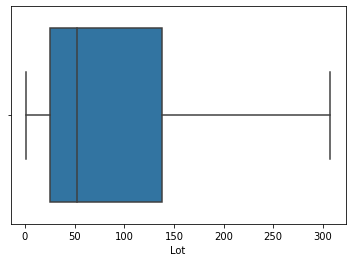

In [34]:
sns.boxplot(df['Lot'])

In [35]:
#outlier treatment for PropertyEvaluationvalue

per25 = df['PropertyEvaluationvalue'].quantile(0.25)
per75 = df['PropertyEvaluationvalue'].quantile(0.75)

In [36]:
per25

425000.0

In [37]:
per75

845000.0

In [38]:
iqr = per75 - per25

In [39]:
iqr

420000.0

In [40]:
upper_limit = per75 + 1.5 * iqr
lower_limit = per25 - 1.5 * iqr

In [41]:
upper_limit

1475000.0

In [42]:
lower_limit

-205000.0

In [43]:
df['PropertyEvaluationvalue'] = np.where(df['PropertyEvaluationvalue'] > upper_limit, upper_limit,
                    np.where(df['PropertyEvaluationvalue'] < lower_limit, lower_limit,
                    df['PropertyEvaluationvalue'] ))

In [44]:
df['PropertyEvaluationvalue'].describe()

count    1.681000e+04
mean     6.774504e+05
std      3.534746e+05
min      1.000440e+05
25%      4.250000e+05
50%      5.900000e+05
75%      8.450000e+05
max      1.475000e+06
Name: PropertyEvaluationvalue, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


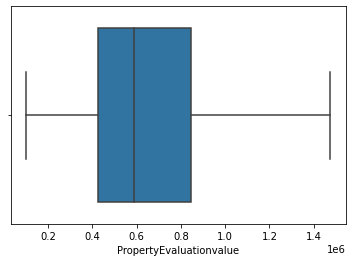

In [45]:
sns.boxplot(df['PropertyEvaluationvalue'])

In [46]:
#outlier treatment for GrossAreaInSqFt

per25 = df['GrossAreaInSqFt'].quantile(0.25)
per75 = df['GrossAreaInSqFt'].quantile(0.75)

In [47]:
per25

1224.0

In [48]:
per75

2449.75

In [49]:
iqr = per75 - per25

In [50]:
iqr

1225.75

In [51]:
upper_limit = per75 + 1.5 * iqr
lower_limit = per25 - 1.5 * iqr

In [52]:
upper_limit

4288.375

In [53]:
lower_limit

-614.625

In [54]:
df['GrossAreaInSqFt'] = np.where(df['GrossAreaInSqFt'] > upper_limit, upper_limit,
                    np.where(df['GrossAreaInSqFt'] < lower_limit, lower_limit,
                    df['GrossAreaInSqFt'] ))

In [55]:
df['GrossAreaInSqFt'].describe()

count    16810.000000
mean      1959.677521
std        966.934568
min          1.000000
25%       1224.000000
50%       1750.000000
75%       2449.750000
max       4288.375000
Name: GrossAreaInSqFt, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


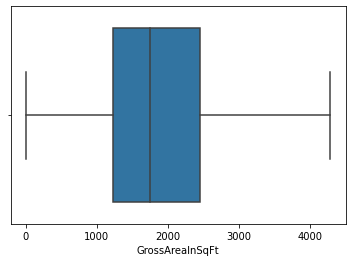

In [56]:
sns.boxplot(df['GrossAreaInSqFt'])

In [57]:
#outlier treatment for LandAreaInSqFt

per25 = df['LandAreaInSqFt'].quantile(0.25)
per75 = df['LandAreaInSqFt'].quantile(0.75)

In [58]:
per25

2100.0

In [59]:
per75

5000.0

In [60]:
iqr = per75 - per25

In [61]:
iqr

2900.0

In [62]:
upper_limit = per75 + 1.5 * iqr
lower_limit = per25 - 1.5 * iqr

In [63]:
upper_limit

9350.0

In [64]:
lower_limit

-2250.0

In [65]:
df['LandAreaInSqFt'] = np.where(df['LandAreaInSqFt'] > upper_limit, upper_limit,
                    np.where(df['LandAreaInSqFt'] < lower_limit, lower_limit,
                    df['LandAreaInSqFt'] ))

In [66]:
df['LandAreaInSqFt'].describe()

count    16810.000000
mean      4058.441701
std       2575.798611
min          1.000000
25%       2100.000000
50%       3200.000000
75%       5000.000000
max       9350.000000
Name: LandAreaInSqFt, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


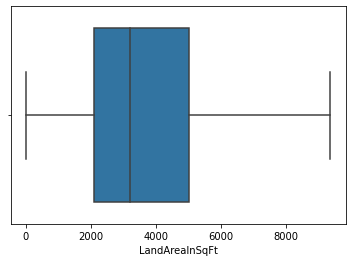

In [67]:
sns.boxplot(df['LandAreaInSqFt'])

In [68]:
#since state has only one unique value remove column

df = df.drop(['State'],  axis=1)

In [69]:
df.columns

Index(['PropertyID', 'Borough', 'Surroundings', 'Address', 'ZipCode', 'Block',
       'Lot', 'BldgClassCategory', 'NoOfResidentialUnits',
       'NoOfCommercialUnits', 'LandAreaInSqFt', 'GrossAreaInSqFt',
       'YearOfConstruction', 'TaxClass_AtEvaluationTime',
       'BldgClass_AtEvaluationTime', 'DateOfEvaluation',
       'PropertyEvaluationvalue'],
      dtype='object')

In [70]:
#remove property id since it is identity value

df = df.drop(['PropertyID'],  axis=1)

In [71]:
df = df.drop(['Surroundings', 'Address', 'BldgClass_AtEvaluationTime', 'BldgClassCategory'],  axis=1)

In [72]:
df.columns

Index(['Borough', 'ZipCode', 'Block', 'Lot', 'NoOfResidentialUnits',
       'NoOfCommercialUnits', 'LandAreaInSqFt', 'GrossAreaInSqFt',
       'YearOfConstruction', 'TaxClass_AtEvaluationTime', 'DateOfEvaluation',
       'PropertyEvaluationvalue'],
      dtype='object')

In [73]:
#converting date into a year as there wouldn't be huge change in tax evaluation within a year

date_col = pd.DatetimeIndex(df['DateOfEvaluation'])

In [74]:
date_col

DatetimeIndex(['2014-05-30', '2014-09-13', '2014-09-28', '2014-05-06',
               '2015-07-02', '2015-03-27', '2014-07-08', '2015-02-25',
               '2014-11-27', '2014-07-23',
               ...
               '2012-12-26', '2014-08-16', '2014-08-13', '2014-04-04',
               '2014-07-19', '2014-11-30', '2014-12-19', '2014-11-16',
               '2014-09-17', '2013-03-22'],
              dtype='datetime64[ns]', name='DateOfEvaluation', length=16810, freq=None)

In [75]:
df['DateOfEvaluation'] = date_col.year

In [76]:
df['DateOfEvaluation'].head()

0    2014
1    2014
2    2014
3    2014
4    2015
Name: DateOfEvaluation, dtype: int64

In [77]:
df.dtypes

Borough                        int64
ZipCode                        int64
Block                          int64
Lot                          float64
NoOfResidentialUnits           int64
NoOfCommercialUnits            int64
LandAreaInSqFt               float64
GrossAreaInSqFt              float64
YearOfConstruction             int64
TaxClass_AtEvaluationTime      int64
DateOfEvaluation               int64
PropertyEvaluationvalue      float64
dtype: object

In [78]:
c_df = df

In [79]:
c_df = pd.get_dummies(c_df,columns = ['Borough', 'TaxClass_AtEvaluationTime'], drop_first = True)

In [80]:
c_df.head()

,ZipCode,Block,Lot,NoOfResidentialUnits,NoOfCommercialUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,DateOfEvaluation,PropertyEvaluationvalue,Borough_2,Borough_3,Borough_4,Borough_5,TaxClass_AtEvaluationTime_2,TaxClass_AtEvaluationTime_4
0,10456,2927,127.0,2,0,1900.0,2394.0,1990,2014,540000.0,0,0,0,0,0,0
1,10457,3037,110.0,3,0,1687.0,3037.0,2002,2014,750000.0,0,0,0,0,0,0
2,10457,2912,155.0,2,0,2000.0,2400.0,1989,2014,470000.0,0,0,0,0,0,0
3,10457,2929,134.0,2,0,2356.0,2394.0,1991,2014,570000.0,0,0,0,0,0,0
4,10457,3036,140.0,2,0,3346.0,2308.0,1993,2015,640000.0,0,0,0,0,0,0


In [81]:
c_df.dtypes

ZipCode                          int64
Block                            int64
Lot                            float64
NoOfResidentialUnits             int64
NoOfCommercialUnits              int64
LandAreaInSqFt                 float64
GrossAreaInSqFt                float64
YearOfConstruction               int64
DateOfEvaluation                 int64
PropertyEvaluationvalue        float64
Borough_2                        uint8
Borough_3                        uint8
Borough_4                        uint8
Borough_5                        uint8
TaxClass_AtEvaluationTime_2      uint8
TaxClass_AtEvaluationTime_4      uint8
dtype: object

In [82]:
X_train = c_df.loc[:,c_df.columns!="PropertyEvaluationvalue"]


In [83]:
y_train = df["PropertyEvaluationvalue"]


In [84]:
y_train.head()

0    540000.0
1    750000.0
2    470000.0
3    570000.0
4    640000.0
Name: PropertyEvaluationvalue, dtype: float64

In [85]:
X_train.shape

(16810, 15)

Reading test data

In [115]:
df_test = pd.read_csv('/content/Test.csv')

In [116]:
df_test.describe()


,Borough,ZipCode,Block,Lot,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime
count,2936.000000,2936.000000,2936.000000,2936.000000,2936.000000,2936.000000,2936.000000,2936.000000,2936.000000,2936.000000,2936.000000
mean,3.385559,10837.683924,5170.971730,279.483651,1.656335,0.136921,1.793256,11015.183924,4060.355586,1975.443460,1.309605
std,1.364623,526.594771,3581.310989,562.104975,4.456347,1.211945,4.733782,37702.788446,14807.827309,23.707392,0.739623
min,1.000000,10001.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,80.000000,1941.000000,1.000000
25%,2.000000,10310.000000,2373.000000,25.000000,1.000000,0.000000,1.000000,2100.000000,1222.000000,1955.000000,1.000000
50%,3.000000,11105.000000,4772.500000,54.000000,1.000000,0.000000,1.000000,3126.500000,1720.000000,1971.000000,1.000000
75%,5.000000,11361.250000,7106.000000,146.000000,2.000000,0.000000,2.000000,5000.000000,2440.250000,2000.000000,1.000000
max,5.000000,11694.000000,16262.000000,5026.000000,128.000000,50.000000,130.000000,484555.000000,231891.000000,2012.000000,4.000000


In [117]:
df_test.shape

(2936, 18)

In [118]:
df_test = df_test.drop_duplicates()

In [119]:
Data_dict = pd.DataFrame(df_test.dtypes)
Data_dict

,0
PropertyID,object
Borough,int64
State,object
Surroundings,object
Address,object
ZipCode,int64
Block,int64
Lot,int64
BldgClassCategory,object
NoOfResidentialUnits,int64


In [120]:

Data_dict['UniqueVal'] = df_test.nunique()
Data_dict

,0,UniqueVal
PropertyID,object,2936
Borough,int64,5
State,object,1
Surroundings,object,223
Address,object,2766
ZipCode,int64,164
Block,int64,2131
Lot,int64,583
BldgClassCategory,object,37
NoOfResidentialUnits,int64,24


In [121]:
corr = df_test.corr()
corr

,Borough,ZipCode,Block,Lot,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime
Borough,1.000000,0.457944,0.299355,0.009729,-0.028404,0.046972,-0.014714,0.039233,0.043270,-0.179691,0.028197
ZipCode,0.457944,1.000000,0.511020,-0.100147,0.031245,0.004580,0.030587,-0.049038,-0.165990,-0.239600,-0.066878
Block,0.299355,0.511020,1.000000,-0.227373,-0.001826,-0.041608,-0.012371,-0.046156,-0.139460,-0.266536,-0.239526
Lot,0.009729,-0.100147,-0.227373,1.000000,-0.047423,-0.020048,-0.049777,0.399012,-0.076744,0.341295,0.276031
NoOfResidentialUnits,-0.028404,0.031245,-0.001826,-0.047423,1.000000,0.100063,0.967011,-0.001254,0.308146,0.022131,-0.002647
NoOfCommercialUnits,0.046972,0.004580,-0.041608,-0.020048,0.100063,1.000000,0.350219,-0.006003,0.333557,0.071432,0.386007
TotalNoOfUnits,-0.014714,0.030587,-0.012371,-0.049777,0.967011,0.350219,1.000000,-0.002717,0.375484,0.039122,0.096334
LandAreaInSqFt,0.039233,-0.049038,-0.046156,0.399012,-0.001254,-0.006003,-0.002717,1.000000,-0.007201,0.038060,0.068779
GrossAreaInSqFt,0.043270,-0.165990,-0.139460,-0.076744,0.308146,0.333557,0.375484,-0.007201,1.000000,0.167455,0.489584
YearOfConstruction,-0.179691,-0.239600,-0.266536,0.341295,0.022131,0.071432,0.039122,0.038060,0.167455,1.000000,0.270110


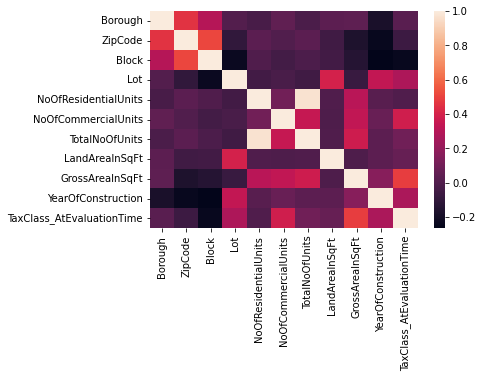

In [122]:
sns.heatmap(corr)

In [123]:
#since TotalNoOfUnits and NoOfResidentialUnits have strong co relation drop one column

df_test = df_test.drop(['TotalNoOfUnits'],  axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


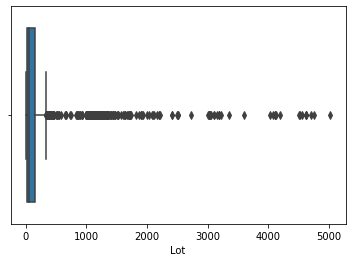

In [124]:
sns.boxplot(df_test['Lot'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


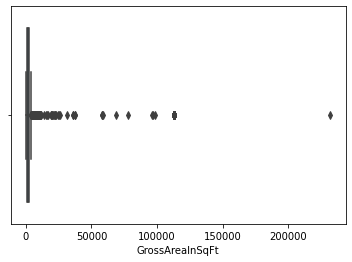

In [125]:
sns.boxplot(df_test['GrossAreaInSqFt'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


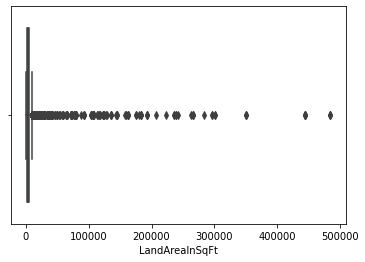

In [126]:
sns.boxplot(df_test['LandAreaInSqFt'])

In [127]:
#outlier treatment by upper bound and lower bound

per25 = df_test['Lot'].quantile(0.25)
per75 = df_test['Lot'].quantile(0.75)

In [128]:
per25

25.0

In [129]:
per75

146.0

In [130]:
iqr = per75 - per25

In [131]:
iqr

121.0

In [132]:
upper_limit = per75 + 1.5 * iqr
lower_limit = per25 - 1.5 * iqr

In [133]:
upper_limit

327.5

In [134]:
lower_limit

-156.5

In [135]:
df_test['Lot'] = np.where(df_test['Lot'] > upper_limit, upper_limit,
                    np.where(df_test['Lot'] < lower_limit, lower_limit,
                    df_test['Lot'] ))

In [136]:
df_test['Lot'].describe()

count    2936.000000
mean      107.877895
std       115.291943
min         1.000000
25%        25.000000
50%        54.000000
75%       146.000000
max       327.500000
Name: Lot, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


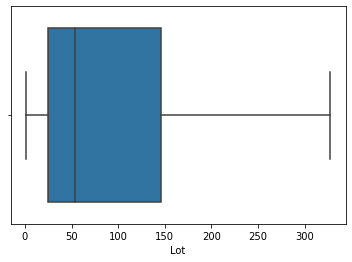

In [137]:
sns.boxplot(df_test['Lot'])

In [138]:
#outlier treatment for GrossAreaInSqFt

per25 = df_test['GrossAreaInSqFt'].quantile(0.25)
per75 = df_test['GrossAreaInSqFt'].quantile(0.75)

In [139]:
iqr = per75 - per25

In [140]:
upper_limit = per75 + 1.5 * iqr
lower_limit = per25 - 1.5 * iqr

In [141]:
df_test['GrossAreaInSqFt'] = np.where(df_test['GrossAreaInSqFt'] > upper_limit, upper_limit,
                    np.where(df_test['GrossAreaInSqFt'] < lower_limit, lower_limit,
                    df_test['GrossAreaInSqFt'] ))

In [142]:
df_test['GrossAreaInSqFt'].describe()

count    2936.000000
mean     1942.514561
std       966.164450
min        80.000000
25%      1222.000000
50%      1720.000000
75%      2440.250000
max      4267.625000
Name: GrossAreaInSqFt, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


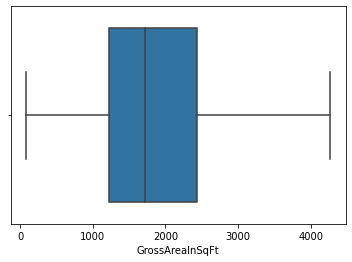

In [143]:
sns.boxplot(df_test['GrossAreaInSqFt'])

In [144]:
#outlier treatment for LandAreaInSqFt

per25 = df_test['LandAreaInSqFt'].quantile(0.25)
per75 = df_test['LandAreaInSqFt'].quantile(0.75)

In [145]:
iqr = per75 - per25

In [146]:
upper_limit = per75 + 1.5 * iqr
lower_limit = per25 - 1.5 * iqr

In [147]:
df_test['LandAreaInSqFt'] = np.where(df_test['LandAreaInSqFt'] > upper_limit, upper_limit,
                    np.where(df_test['LandAreaInSqFt'] < lower_limit, lower_limit,
                    df_test['LandAreaInSqFt'] ))

In [148]:
df_test['LandAreaInSqFt'].describe()

count    2936.000000
mean     4050.566417
std      2586.540249
min         1.000000
25%      2100.000000
50%      3126.500000
75%      5000.000000
max      9350.000000
Name: LandAreaInSqFt, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


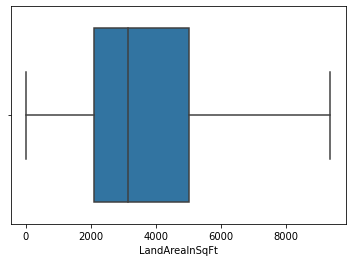

In [149]:
sns.boxplot(df_test['LandAreaInSqFt'])

In [150]:
#since state has only one unique value remove column

df_test = df_test.drop(['State'],  axis=1)

In [151]:
df_test = df_test.drop(['Surroundings', 'Address', 'BldgClass_AtEvaluationTime', 'BldgClassCategory'],  axis=1)

In [152]:
#remove property id since it is identity value

df_test = df_test.drop(['PropertyID'],  axis=1)

In [153]:
#converting date into a year as there wouldn't be huge change in tax evaluation within a year

date_col = pd.DatetimeIndex(df_test['DateOfEvaluation'])

In [154]:
date_col


DatetimeIndex(['2013-06-24', '2014-08-28', '2015-01-31', '2015-12-03',
               '2014-07-06', '2014-04-19', '2014-08-24', '2012-01-08',
               '2012-08-22', '2015-04-03',
               ...
               '2015-02-28', '2014-08-17', '2015-03-20', '2014-10-09',
               '2012-10-23', '2015-02-21', '2014-04-06', '2014-06-08',
               '2014-04-30', '2014-10-25'],
              dtype='datetime64[ns]', name='DateOfEvaluation', length=2936, freq=None)

In [155]:
df_test['DateOfEvaluation'] = date_col.year

In [156]:
df_test['DateOfEvaluation'].head()

0    2013
1    2014
2    2015
3    2015
4    2014
Name: DateOfEvaluation, dtype: int64

In [157]:
df_test.dtypes

Borough                        int64
ZipCode                        int64
Block                          int64
Lot                          float64
NoOfResidentialUnits           int64
NoOfCommercialUnits            int64
LandAreaInSqFt               float64
GrossAreaInSqFt              float64
YearOfConstruction             int64
TaxClass_AtEvaluationTime      int64
DateOfEvaluation               int64
dtype: object

In [158]:
c_df_test = df_test

In [159]:
c_df_test = pd.get_dummies(c_df_test,columns = ['Borough',  'TaxClass_AtEvaluationTime'], drop_first = True)

In [160]:
c_df_test.head()

,ZipCode,Block,Lot,NoOfResidentialUnits,NoOfCommercialUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,DateOfEvaluation,Borough_2,Borough_3,Borough_4,Borough_5,TaxClass_AtEvaluationTime_2,TaxClass_AtEvaluationTime_4
0,10457,2929,117.0,2,0,2498.0,2394.000,1995,2013,0,0,0,0,0,0
1,10457,3036,65.0,2,0,2033.0,2340.000,1994,2014,0,0,0,0,0,0
2,10457,3048,51.0,4,1,2500.0,4267.625,1963,2015,0,0,0,0,1,0
3,10457,2899,34.0,0,1,3439.0,3320.000,1951,2015,0,0,0,0,0,1
4,10457,3083,40.0,3,0,1348.0,2931.000,1997,2014,0,0,0,0,0,0


In [161]:
c_df_test.shape

(2936, 15)

In [162]:
X_test = c_df_test

In [163]:
X_test.shape

(2936, 15)

In [164]:
y_test = pd.read_csv('/content/samplesubmission.csv')

In [165]:
y_test = y_test.drop(['PropertyID'], axis=1)

In [166]:
y_test

,PropertyEvaluationvalue
0,1064701
1,1114550
2,1108206
3,1154822
4,1026546
...,...
2931,1033868
2932,1089966
2933,1162904
2934,1036053


Linear Regression

In [167]:
from sklearn.linear_model import LinearRegression

In [168]:
from sklearn.metrics import mean_absolute_percentage_error

In [169]:
lm=LinearRegression()
lm.fit(X_train,y_train)
y_train_pred=lm.predict(X_train)
y_test_pred_lm=lm.predict(X_test)


In [170]:
mean_absolute_percentage_error(y_train,y_train_pred)

0.4302118753669266

In [171]:
mean_absolute_percentage_error(y_test, y_test_pred_lm)

0.3928820251974343

KNN Regressor

In [172]:
from sklearn.neighbors import KNeighborsRegressor

In [173]:
knn=KNeighborsRegressor()
knn.fit(X_train,y_train)
y_train_pred=knn.predict(X_train)
y_test_pred_knn=knn.predict(X_test)

In [174]:
mean_absolute_percentage_error(y_train,y_train_pred)

0.2683066676157232

In [175]:
mean_absolute_percentage_error(y_test, y_test_pred_knn)

0.4351011309656994

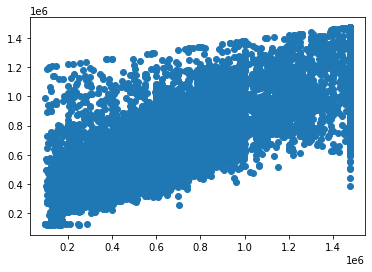

In [176]:
plt.scatter(y_train,y_train_pred)


In [210]:
ser_out =pd.Series(y_test_pred_knn)



In [211]:
df_out = pd.DataFrame(ser_out) 

In [212]:
df_out.head()

,0
0,571643.2
1,400780.0
2,625500.0
3,638000.0
4,655223.0


In [214]:
df_out.columns= ['PropertyEvaluationvalue']

In [215]:
df_out.head()

,PropertyEvaluationvalue
0,571643.2
1,400780.0
2,625500.0
3,638000.0
4,655223.0


In [217]:
df_out_1 = pd.read_csv('/content/samplesubmission.csv')

In [218]:
df_out_1.head()

,PropertyID,PropertyEvaluationvalue
0,PR51101,1064701
1,PR51102,1114550
2,PR51103,1108206
3,PR51104,1154822
4,PR51105,1026546


In [220]:
df_out_1 = df_out_1.drop(['PropertyEvaluationvalue'], axis=1)

In [226]:
df_out_1

,PropertyID
0,PR51101
1,PR51102
2,PR51103
3,PR51104
4,PR51105
...,...
2931,PR54032
2932,PR54033
2933,PR54034
2934,PR54035


In [224]:
df_out

,PropertyEvaluationvalue
0,571643.2
1,400780.0
2,625500.0
3,638000.0
4,655223.0
...,...
2931,894102.4
2932,1475000.0
2933,1475000.0
2934,1475000.0


In [227]:
df_result = df_out_1.join(df_out)

In [228]:
df_result.head()

,PropertyID,PropertyEvaluationvalue
0,PR51101,571643.2
1,PR51102,400780.0
2,PR51103,625500.0
3,PR51104,638000.0
4,PR51105,655223.0


In [229]:
df_result.to_csv('output.csv')